# Section 2:  Guide to Loading and Manipulating the Season 08 - 16 Coadded Maps.  

This Section will cover how to read in and manipulate the large coadded maps presented in [Naess et al. (2020)](https://www.overleaf.com/5395816498bsknshgxbmyr), covering close to half the sky in temperature and polarization.

We ask that when using this data product you reference the original work ([Naess et al. (2020)](https://www.overleaf.com/5395816498bsknshgxbmyr)).

To return to navigate between sections, use the links in the table of contents.

## Table of contents

 --- 
> [Section 1](Section_1_Introduction.ipynb): Introduction to AdvACT Data Release 4

> [Section 2](Section_2_coadded_maps.ipynb): S08-16 Coadded maps from [Naess et al. (2020)](https://www.overleaf.com/5395816498bsknshgxbmyr) and an Introduction to Pixell

> [Section 3](Section_3_HEALPix_CAR_Conversions.ipynb):  Demonstration of methods to convert maps between HEALPix format and the CAR format.

> [Section 4](Section_4_visualize_objects.ipynb):  Guide to using Pixell to look at objects in the maps and stacking our maps on catalogue positions.

> [Section 5](Section_5_Lensing_maps.ipynb):  Introduction to the Lensing maps from [Darwish et al](https://arxiv.org/pdf/2004.01139.pdf)

> [Section 6](Section_6_Component_separated_maps.ipynb):  Guide to the use of the Component Separated maps from [Madhavacheril et al. (2020)](https://arxiv.org/abs/1911.05717)

> [Section 7](Section_7_power_spectra_part_1.ipynb): Harmonic Analysis using CAR maps [Naess et al, in preparation]

> [Section 8](Section_8_power_spectra_part_2.ipynb) Power Spectrum example using Nawrapper [Aiola et al] and [Choi et al] 

> [Section 9](Section_9_Noise_sims.ipynb): Generating Noise Simulations 

> [Section 10](Section_10_E_B_maps.ipynb):  Look at how to generate E and B maps from I, Q, U maps. 

> [Section 11](Section_11_ACT_likelihood.ipynb): Using the ACT Likelihood code
 
> [Section 12](Section_12_delensing_param_shifts.ipynb):  Delensing the CMB powerspectrum and comparing the delensed and lensed parameters from [Han et al. 2020, in preparation]
---

This section will walk users through using Pixell to access maps.  The demonstration is done using the 150 GHz ACT + Planck S08-16 coadded maps discussed in [Naess et al. (2020)](https://www.overleaf.com/5395816498bsknshgxbmyr).  The other coadded maps provided are listed in Table 2.  Substituting these file names allows you to switch between frequencies, maps built with and without Planck, and the coadded map used in this example.

These coadded maps cover an area of $0^o < RA < 360^o$, $-62^o < dec < 22^o$ and include variations with and without Planck data.  The maps correspond to an area of 26.4 thousand square degrees, of which about 70% is exposed.

The full coadded maps include data from season 8 to season 18 and will be released on LAMBDA at a later date.  In the mean time we provide users with a coadd of the season 08-16 data which can be used to familiarize yourself with the scope and scale of these maps as well as to learn the basics of Pixell.  These maps can be used for a range of analyses, however, they should not be used for precision cosmology as we do not provide a noise model or the splits that would be needed to use these maps correctly.

For each frequency, we provide both temperature and polarization data.  The polarization angle has been calibrated, but the polarization leakage of the beam has not been corrected and we do not provide a complete noise model.  We will release fully vetted polarization maps including splits with which the noise can be evaluated in a future release.  In the present form cosmological analysis of these spectra is not possible though one can use these coadded maps for studies of foregrounds, the galaxy, and (with proper care) point source properties.

These maps are produced by combining observations from multiple seasons and arrays as well as from both ACT and Planck. The results are combined multi season maps that are easier to use and understand than the individual season or array maps used to create them.   


These maps and the full coadded maps are explained in much greater detail in [Naess et al. (2020)](https://www.overleaf.com/5395816498bsknshgxbmyr)


 ---
Table 2: Coadded S08-S16 Maps
---


 Map File Name | Key Details
 :--|:--
  act_dr4.01_s08s16_AA_f090_night_map_srcfree.fits | 98 GHz ACT only, source free maps,  units of $\mu$K  
  act_dr4.01_s08s16_AA_f090_night_map.fits   | 98 GHz ACT only, point sources included, units of $\mu$K 
  act_dr4.01_s08s16_AA_f090_night_ivar.fits | 98 GHz ACT only, inverse variance (similar to hit count maps) units of $1/ \mu K^2$
  |
  act_dr4.01_s08s16_AA_f150_night_map_srcfree.fits | 150 GHz ACT only, source free maps,  units of $\mu$K  
  act_dr4.01_s08s16_AA_f150_night_map.fits   | 150 GHz ACT only, point sources included, units of $\mu$K
  act_dr4.01_s08s16_AA_f150_night_ivar.fits  | 150 GHz ACT only, inverse variance (similar to hit count maps) units of $1/ \mu K^2$ 
   |
  **ACT + Planck Maps**|
   act_planck_dr4.01_s08s16_AA_f090_night_map_srcfree.fits | 98 GHz  ACT + Planck combined, source free maps,  units of $\mu$K  
  act_planck_dr4.01_s08s16_AA_f090_night_map.fits | 98 GHz ACT + Planck combined, point sources included, units of $\mu$K 
  act_planck_dr4.01_s08s16_AA_f090_night_ivar.fits | 98 GHz  ACT + Planck combined, inverse variance (similar to hit count maps) units of $1/ \mu K^2$ 
  |
   act_planck_dr4.01_s08s16_AA_f150_night_map_srcfree.fits | 150 GHz  ACT + Planck combined, source free maps,  units of $\mu$K  (Replace I with Q or U to get other components)
  act_planck_dr4.01_s08s16_AA_f150_night_map.fits  | 150 GHz  ACT + Planck combined, point sources included, units of $\mu$K 
  act_planck_dr4.01_s08s16_AA_f150_night_ivar.fits  | 150 GHz  ACT + Planck combined, inverse variance (similar to hit count maps) units of $1/ \mu K^2$ 
  |

---


## Initialize notebook

We begin by importing Pixell and other neccesary functions by running the introductory notebook.

In [1]:
%run Section_1_Introduction.ipynb

## Reading in the maps

Here we will demonstrate how to initially read in CAR maps and how to examine them using various Pixell based tools.

In this example we will read in the 150 GHz intensity map.  The map products actually contain I, Q and U maps so we select only the first one using the 0 after the read_map command. Once downloaded from [LAMBDA](https://lambda.gsfc.nasa.gov/product/act/), you can read the various maps described in Table 2 using the same command.

Due to the size of these maps we offer users to options for working with the maps to make them easier to work with.  

    1) You can read in the full area, down graded intensity map, which has been provided so that you can avoid using the full coadded map if those files are too large for your computer

    2) Alternatively if you have space for the full file but don't want to read the whole map in we demonstrate how to read in just a small area of the full map using the higher resolution map.

You can of course choose to read in the full map in it's entirety as well but that may be difficult on some computers.

In [110]:
# Option 1: Read in the downgraded map

imap = enmap.read_map(path + "act_planck_dr4.01_s08s16_AA_f150_night_map_dg_I.fits")

In [111]:
# Option 2: Read in a subset of the full map

# Set the size of the box in degrees and convert to radians
dec_from, dec_to = np.deg2rad([-40,-10])
ra_from, ra_to = np.deg2rad([-25, 25])

# Create the box
box = [[dec_from,ra_from],[dec_to,ra_to]]

# read in the map
imap = enmap.read_map(path + "act_planck_dr4.01_s08s16_AA_f150_night_map.fits", \
                      box = box)[0]

The map is stored as an [ndmap](https://pixell.readthedocs.io/en/latest/usage.html#the-ndmap-object) object, which combines a numpy array with a WCS object describing the relation between pixel space and the celestial sphere. In order to examine the WCS and shape of the map simply call the objects as shown here.

In [112]:
print(imap.shape)
print(imap.wcs)

(3600, 6000)
car:{cdelt:[0.008333,0.008333],crval:[0,0],crpix:[3001,4801]}


The WCS object includes important information that Pixell uses to handle the maps.  The first item is the projection which for this map is 'car'.  While Pixell can handle other projections, the most recent ACT maps are all in CAR, or Plate Carée, format.  This means that the sky can be directly mapped on to the pixels using the simple relations:
$$\phi  = x, \quad \theta = y$$ 

Where $\phi$ is the Right Ascension and $\theta$ is declination.

For more information on WCS objects consider referencing the [astropy wcs documentation](http://docs.astropy.org/en/stable/wcs/index.html) . 

## Visualizing the maps

The module pixell.enplot has built-in tools that allow you to easily plot maps; a full list can be found in the Pixell code available on Github.

Here we provide several examples of these features including downgrading (which is done internally through pixel averaging), adjusting the frequency of the ticks on the axes, and displaying a color bar. 

Some other useful keywords that are used later in this notebook are:

*   "upgrade" - useful for plotting small stamps around point sources
*   "min", "max", and "range" - set the color range for the colorbar
*   "color" - set the color map for the maps (e.g. planck, wmap, hotcold, etc.)





In [113]:
def eshow(x,**kwargs): 
    ''' Define a function to help us plot the maps neatly '''
    plots = enplot.get_plots(x, **kwargs)
    enplot.show(plots, method = "ipython")

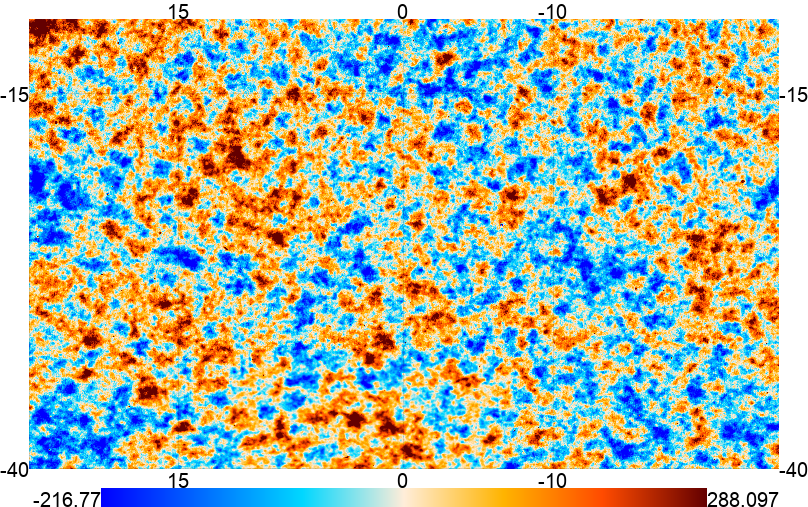

In [114]:
# add "color", "min", "max", "range" etc keys here to adjust your plot
keys = {"downgrade": 8, "ticks": 25, "colorbar": True}  
eshow(imap, **keys)

### Selecting a smaller patch of the sky

One of the advantages of using the CAR and Pixell framework is that you can easily select a small region of the map to examine in more detail.  Users can select a submap at a specific location by creating a bounding box around a central location in RA and DEC.  For example if we wanted to visualize an object at RA = 0 and dec = 0  we can create a box, with a width of 5 degrees, around this location.  Note that Pixell takes in bounding boxes in radians so here we convert the dec, ra and width to radians using numpy before forming the box.

You can also create a box using the framework:

> box = [[dec_from, ra_from],[dec_to, ra_to]] $\quad$ (in radians)

 

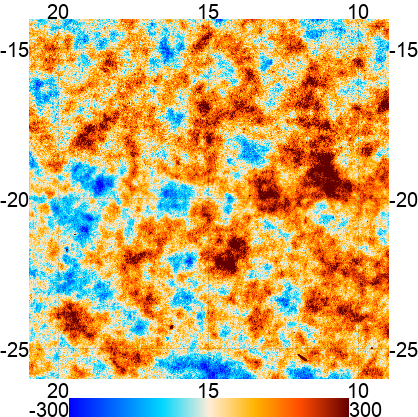

car:{cdelt:[0.008333,0.008333],crval:[0,0],crpix:[3001,4801]}

In [117]:
# Set up a box around dec = 0 and ra = 0
dec,ra = np.deg2rad([-20,15])

# Give the box a width of 5 degrees
width = np.deg2rad(12)

# Create the box and use it to select a submap
box = [[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]]
smap = imap.submap(box)

# Plot the map using the eshow function we defined earlier 
# (if you're using the downgraded map you may want to delete the "downgrade" argument here)
eshow(smap, **{"colorbar":True, "range": 300, "downgrade": 4 ,"ticks": 5})
imap.wcs

### Selecting a patch using pixel indexing
Alternatively we can slice the map using numpy array indexing to get a submap.  This will select a submap using the indexes of the pixels themselves instead of sky coordinates.  We will do that now for a larger area.  

What's useful about this is that you can treat the maps like a numpy array and pixell will automatically handle fixing the map projections as needed by adjusting the wcs information stored with the map.  If you look at the two wcs's printed after the map you can see the resolution stayed fixed but the center pixel adjusted when we cut the map.

Later on in these notebooks we will use this method to look at galaxy clusters and Messier objects.

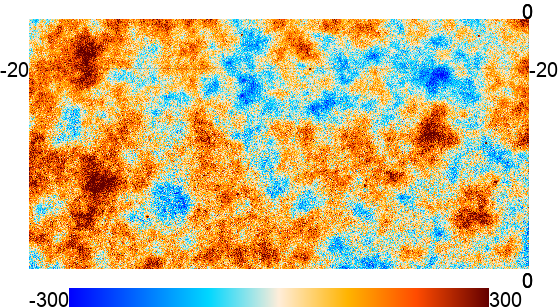

car:{cdelt:[0.008333,0.008333],crval:[0,0],crpix:[3001,4801]}
car:{cdelt:[0.008333,0.008333],crval:[0,0],crpix:[1,2801]}


In [116]:
smap_2 = imap[2000:2500,3000:4000]

eshow(smap_2, **{"downgrade": 2, "colorbar": True, "ticks": 10, "range": 300})

print(imap.wcs)
print(smap_2.wcs)

### Continue to the next section

[Section 3](Section_3_HEALPix_CAR_Conversions.ipynb):  Demonstration of methods to converted maps between HEALPix format and the CAR format.
